# Replication 3: R
Group  : 1

Members:
- Juan José Tang
- Ursula Cotrina 
- Victoria Olivera


In [126]:
library('doBy')
library('collapse')
library("ggplot2")
library("tidyverse")
library("lubridate")
library("glmnet")
library("lmtest")
library("sandwich")

### Multiconilearity

Multicollinearity refers to the situation in which, under a econometric model, there are two or more regressors (also called independent variables) that are correlated in some degree. Usually, in the literature, this problem is separated in:

+ *Perfect multicollinearity:* a problem that implies the matrix (X'X) not being invertible, as it does not have complete rank anymore. This problem arises when at least one regressor is a linear combination of other regressor(s).

+ *Imperfect multicollinearity:* appears when there is a high correlation, altough not perfectly linear, between regressors. The OLS method can still be applied, and the coefficients can be calculated. Nevertheless, the variance of these estimators will increase as the correlation increases, leading to lower t-statistics, and hence a higher probability of not rejecting the null hypothesis H0, even though the variable could be relevant.

To see this, consider the following model:

$$Y_i = \beta_1 + \beta_2 W_{2i} + ... + \beta_{k-1}W_{(k-1)i} + \beta_z Z_i + \mu_i$$

Where the correlation between Z and variables W is high. We want to prove that the variance of the estimator $\beta_z$ increases as the correlation between the W's and Z increases. Let us put the presented model in matrix form, as:

$$y =  W\beta + Z \beta_z + \mu$$

Where W is the matrix of variables $W_j$ and the column of 1's. Z is the column vector of variables $Z_i$. Applying the Frisch-Waugh Theorem and partial regressions, we know that:

$$ \widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w y$$

Where $M_w = I - W(W'W)^{-1}W'$, then:

$$\widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w ( W\beta + Z \beta_z + \mu) = \beta_z + (Z'M_w Z)^{-1}Z' M_w \mu$$

Therefore, $E(\widehat{\beta_z}) = \beta_z$ the estimator is unbiased. It follows from that:

$$var(\widehat{\beta_z}) = E\left[(\widehat{\beta_z}-\beta_z)(\widehat{\beta_z}-\beta_z)'\right]$$

$$var(\widehat{\beta_z}) = E\left[((Z'M_w Z)^{-1}Z' M_w \mu)(\mu 'M_w^{'}Z(Z'M_w Z)^{-1} )\right]$$

$$var(\widehat{\beta_z}) = E\left[(Z'M_w Z)^{-1}Z' M_w \mu \mu 'M_w^{'}Z(Z'M_w Z)^{-1}\right] $$

$$var(\widehat{\beta_z}) = \sigma^2 (Z'M_w Z)^{-1} = \frac{\sigma^2}{Z'M_w Z} = \frac{\sigma^2}{Z'M_w^{'}M_w Z} = \frac{\sigma^2}{e_z^{'} e_z} $$

Recall that $M_w Z$ is the vector of residuals from the regression of Z on the variables $W_j$. This latter regression yields a $R^2$:

$$R^2_z = 1- \frac{e_z^{'} e_z}{\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

Replacing $e_z^{'} e_z$ as a function of $R^2$ in the equation of the variance:

$$var(\widehat{\beta_z}) = \frac{\sigma^2}{(1-R^2_z)\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

While the correlation between Z and $W_j$ increases (which implies $R^2_z \rightarrow 1$), then $var(\widehat{\beta_z}) \rightarrow \infty$.

In [96]:
A <- matrix(c(rnorm(10,mean=0, sd=1), rnorm(10,mean=0, sd=1), rnorm(10,mean=0, sd=1), rnorm(10,mean=0, sd=1), rnorm(10,mean=0, sd=1), rnorm(10,mean=0, sd=1),rnorm(10,mean=0, sd=1),rnorm(10,mean=0, sd=1),rnorm(10,mean=0, sd=1)), ncol = 9, byrow =FALSE)
print(A)

            [,1]        [,2]       [,3]        [,4]        [,5]        [,6]
 [1,] -0.7604613 -0.69284164 -0.5263319  0.22585604 -0.33825103 -0.30257184
 [2,]  1.5243525 -0.22893417 -0.7935051 -0.40913546  0.97142887  1.65263108
 [3,] -0.4293014 -0.58001738  1.4298945  1.37781673 -1.02281882 -0.96448115
 [4,]  0.2048728  0.67877205  1.0071748 -0.89670180 -1.86788927  1.25853366
 [5,]  0.1573091 -1.00276614 -1.3710948 -0.09982891  0.05959223 -0.07911139
 [6,] -1.8186730  0.50896258 -0.3455229 -0.56823540  1.15986383  0.38276365
 [7,] -0.1016179 -2.65060713 -1.1830518 -0.07567624  0.61997287 -0.81691148
 [8,]  0.7344060 -0.78032809  1.4069185 -0.36421402  0.15328813 -0.97971736
 [9,]  0.4056031  0.08494898  0.5388587  0.06595904  1.48480357 -1.82859556
[10,]  2.1174939  1.78519600  0.1560838  2.39896000  1.85574253 -1.19560779
              [,7]        [,8]       [,9]
 [1,] -1.312715710  0.29167451 -1.0523901
 [2,] -2.101831697  0.08438825  0.1171776
 [3,] -0.355677939  2.37008494 -0.9823

In [97]:
A <- cbind(A,A[,1]+A[,2]+A[,3])
A

-0.7604613,-0.69284164,-0.5263319,0.22585604,-0.33825103,-0.30257184,-1.312715710,0.29167451,-1.0523901,-1.9796349
1.5243525,-0.22893417,-0.7935051,-0.40913546,0.97142887,1.65263108,-2.101831697,0.08438825,0.1171776,0.5019133
-0.4293014,-0.58001738,1.4298945,1.37781673,-1.02281882,-0.96448115,-0.355677939,2.37008494,-0.9823623,0.4205757
0.2048728,0.67877205,1.0071748,-0.89670180,-1.86788927,1.25853366,-1.232363836,2.16214176,-1.3027098,1.8908196
0.1573091,-1.00276614,-1.3710948,-0.09982891,0.05959223,-0.07911139,0.511273230,2.30235949,-0.8976971,-2.2165518
-1.8186730,0.50896258,-0.3455229,-0.56823540,1.15986383,0.38276365,-0.398174999,1.74742691,0.7342759,-1.6552333
-0.1016179,-2.65060713,-1.1830518,-0.07567624,0.61997287,-0.81691148,-0.002866395,0.52646286,-0.0230871,-3.9352768
0.7344060,-0.78032809,1.4069185,-0.36421402,0.15328813,-0.97971736,-0.152444121,-1.04172447,-0.8565791,1.3609964
0.4056031,0.08494898,0.5388587,0.06595904,1.48480357,-1.82859556,-0.613069894,0.47956445,-1.0796058,1.0294108
2.1174939,1.78519600,0.1560838,2.39896000,1.85574253,-1.19560779,0.078500539,0.68595992,1.5952302,4.0587737


In [98]:
B <- solve(A)
B

ERROR: Error in solve.default(A): sistema es computacionalmente singular: número de condición recíproco = 9.93115e-18


Since the 10th vector is a linear combination of the first three column vectors, there is no inverse matrix because it is singular. This is the case of perfect multicollinearity. Instead, in python, whe get a pseudo-inverse of a matrix.

## Analyzing RCT data with Precision Adjustment

In [99]:
## loading the data
Penn <- as.data.frame(read.table("../../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

The following objects are masked from Penn (pos = 3):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 4):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 24):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg




In [100]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [101]:
#summarize variables 
summary(Penn)

      abdt             tg            inuidur1        inuidur2    
 Min.   :10404   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:10600   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median :10698   Median :0.0000   Median :11.00   Median :10.00  
 Mean   :10696   Mean   :0.8398   Mean   :13.03   Mean   :12.25  
 3rd Qu.:10796   3rd Qu.:2.0000   3rd Qu.:25.00   3rd Qu.:23.00  
 Max.   :10880   Max.   :2.0000   Max.   :52.00   Max.   :52.00  
     female           black           hispanic          othrace        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.4007   Mean   :0.1188   Mean   :0.03632   Mean   :0.005189  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      dep               q1        

In [140]:
mean(filter(Penn, tg==0)$inuidur1)

[1] 13.33781

In [141]:
mean(filter(Penn, tg==2)$inuidur1)

[1] 12.61285

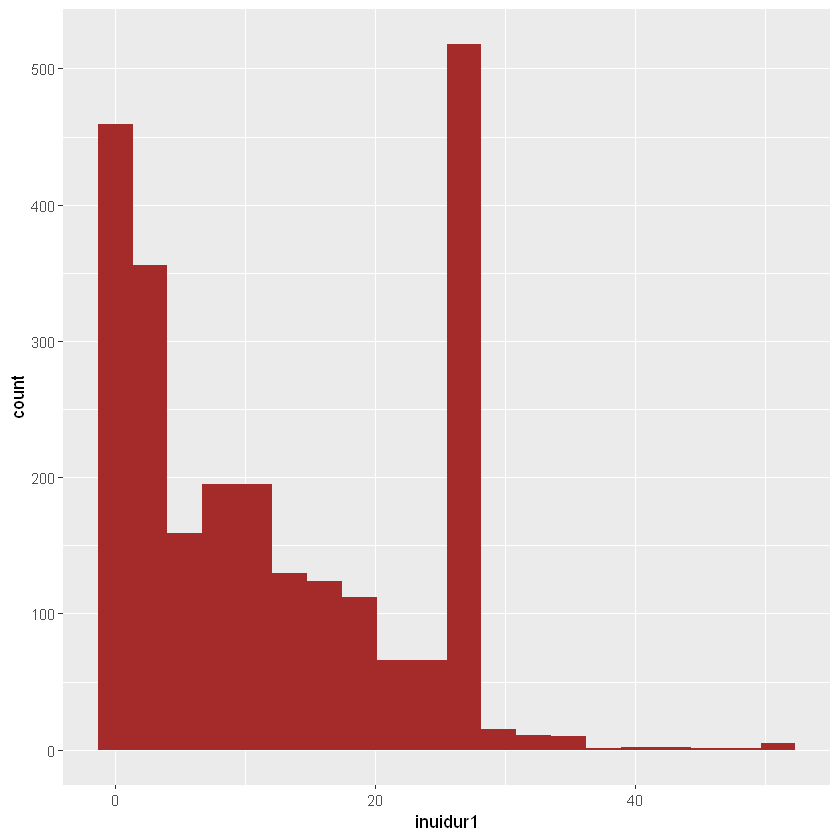

In [129]:
base <- ggplot(subset(Penn, tg==2), aes(inuidur1))
base + geom_histogram(bins = 20, fill="brown")

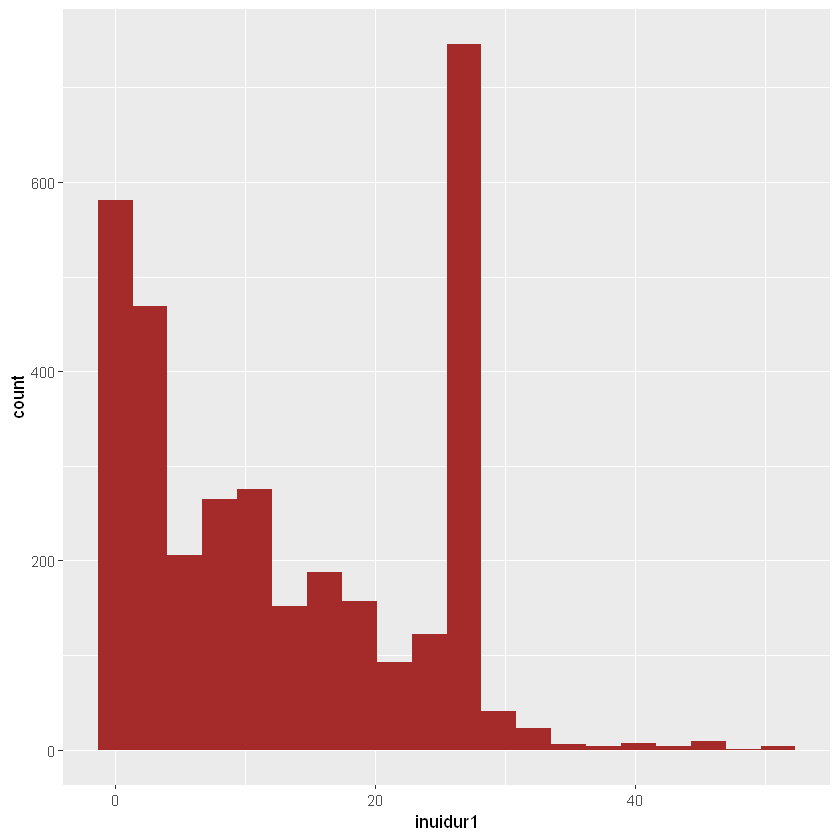

In [130]:
base <- ggplot(subset(Penn, tg==0), aes(inuidur1))
base + geom_histogram(bins = 20, fill="brown")

As we can see, both histograms are right-skewed distributions. However, for the control group, the length of the first spell of unemployment is slightly larger than the treatment group.

In [104]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [105]:
# get same dataframe

X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../../data/m_reg2.RData")

### Classical 2-sample approach, no adjustment (CL)

In [106]:
# model specifications
# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2

# Omitted dummies: q1, nondurable, muld

ols.cl_reg <- lm(formula_cl)
ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
print(ols.cl)




t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



### Classical linear regression adjustment (CRA)

In [107]:
# adding controls

formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
ols.cra_reg <- lm(formula_cra)
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))
print(ols.cra)



t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

In [108]:
# get same dataframe for ols.cl

X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


names(X1)[2] <- "T2"
save( X1, file = "../../data/ols_cra_reg2.RData")

In [109]:
# interactive regression model variables 

X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #without intercept



### Interactive regression model (IRA)

In [110]:

#interactive regression model

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)





t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [111]:
head(X)

,female,black,othrace,factor(dep)1,factor(dep)2,q2,q3,q4,q5,q6,...,agelt35:agegt54,agelt35:durable,agelt35:lusd,agelt35:husd,agegt54:durable,agegt54:lusd,agegt54:husd,durable:lusd,durable:husd,lusd:husd
1,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
2,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,-0.06520235,...,0,-0.07350398,0.8675199,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
3,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
4,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
5,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,-0.01885161,-0.0325147,-0.02767209,-0.05499827,-0.02905569,0
6,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,-0.06520235,...,0,-0.07350398,-0.1324801,-0.1219301,0.98114839,0.9674853,-0.02767209,0.94500173,-0.02905569,0


In [112]:
# T2*female
ols_ira.est_female <- ols.ira["T2TRUE:Xfemale",1]
CI1upper <-confint(ols.ira)["T2TRUE:Xfemale",2]
CI1low <-confint(ols.ira)["T2TRUE:Xfemale",1]

In [113]:
# T2*black
ols_ira.est_black <- ols.ira["T2TRUE:Xblack",1]
CI2upper <-confint(ols.ira)["T2TRUE:Xblack",2]
CI2low <-confint(ols.ira)["T2TRUE:Xblack",1]

In [114]:
# T2*agelt35
ols_ira.est_age <- ols.ira["T2TRUE:Xagelt35",1]
CI3upper <-confint(ols.ira)["T2TRUE:Xagelt35",2]
CI3low <-confint(ols.ira)["T2TRUE:Xagelt35",1]

In [115]:
# T2*factor(dep)1
ols_ira.est_dep1 <- ols.ira["T2TRUE:Xfactor(dep)1",1]
CI4upper <-confint(ols.ira)["T2TRUE:Xfactor(dep)1",2]
CI4low <-confint(ols.ira)["T2TRUE:Xfactor(dep)1",1]

In [116]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

names(S1)[2] <- "T2"
save( S1, file = "../../data/ols_ira_reg2.RData")



### Interactive regression adjustment (IRA) using Lasso

In [117]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [118]:
library(hdm)

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T4 treatment )
print(rlasso.ira)



[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [119]:
# getting data
S = as.data.frame(DX)
save( S, file = "../../data/rlasso_ira_reg2.RData")

In [120]:
head(S)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,...,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,...,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,...,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


### Results

In [125]:
install.packages("xtable")
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

#print(tab, type="latex", digits=5)

Warning message:
"package 'xtable' is in use and will not be installed"


,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


## Plotting confidence intervals

In [122]:
'Plotting confidence intervals'
CIdf <- data.frame(x = c('T2*female','T2*black','T2*agelt35','T2*factor(dep)1'),
                         y = c(ols_ira.est_female, ols_ira.est_black,ols_ira.est_age, ols_ira.est_dep1),
                         lower = c(CI1low,CI2low,CI3low,CI4low),
                         upper = c(CI1upper,CI2upper,CI3upper,CI4upper))


[1] "Plotting confidence intervals"

In [123]:
CIdf

x,y,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
T2*female,-0.6597505,-1.7377634,0.4182624
T2*black,0.4525570,-0.5478666,1.4529806
T2*agelt35,1.1233199,-0.1262699,2.3729098
T2*factor(dep)1,0.7636025,-0.7761822,2.3033871


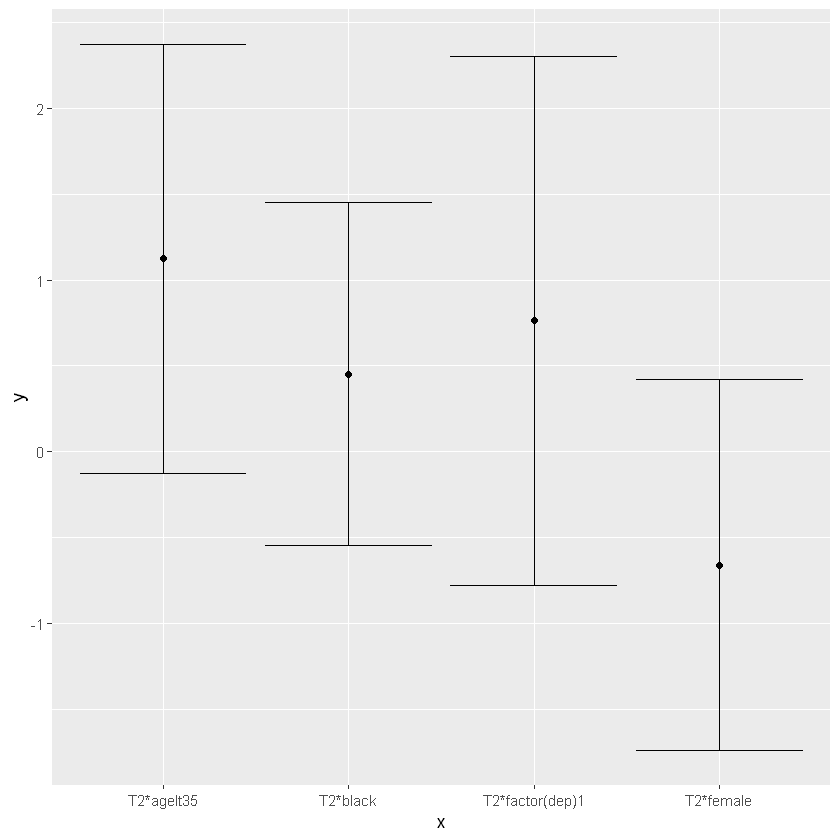

In [124]:
ggplot(CIdf, aes(x, y)) +        # ggplot2 plot with confidence intervals
  geom_point() +
  geom_errorbar(aes(ymin = lower, ymax = upper))


All the variables are not significant because their confidence intervals consider a negative lower limit and a positive upper limit. Moreover, about the estimators, the coefficient of T2\*female tell us that the reduction of unemployment spell for women is, on average, 66% more than men due to the program. For black people treated, on average, the unemployment spell (in weeks) is 45% more than no black people treated. For people who are under 35 years old, the program had an effect in the increase of unemployment spell, 112% higher compared to people older than 35 years old. Finally, on average, for people treated whose number of dependents is 1, the  length of unemployment spell increase in 76% compared to people treated whose number of dependents is 0.